In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
data=pd.read_csv("advertising.csv")

In [3]:
data.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


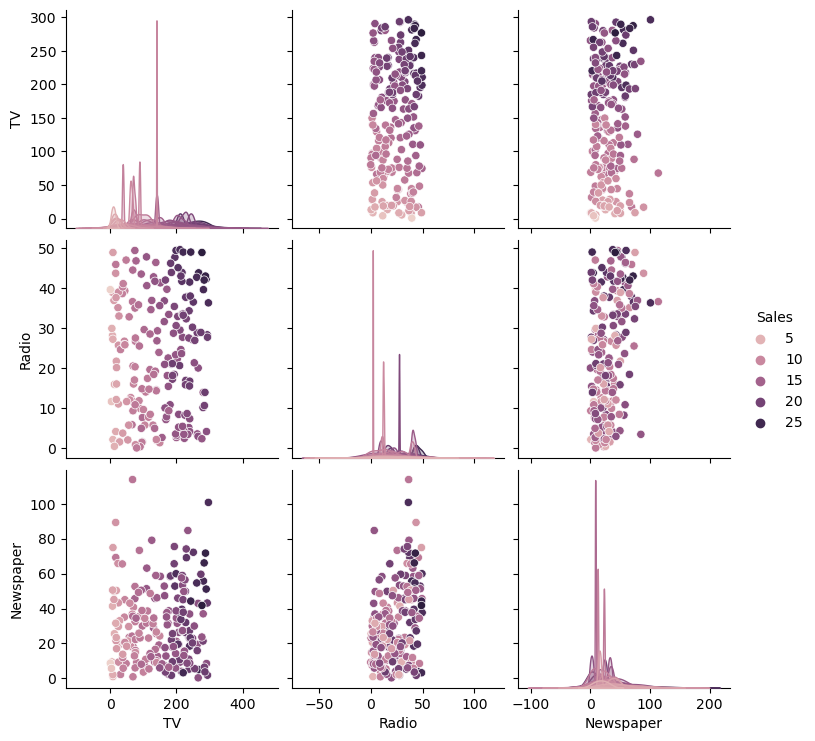

In [4]:
sns.pairplot(data=data,hue="Sales")

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
minm=MinMaxScaler()

In [7]:
mm=minm.fit_transform(data)

In [8]:
selldata=pd.DataFrame(mm,columns=data.columns)

In [9]:
selldata.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
ln=LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=selldata[["TV","Radio","Newspaper"]]

In [14]:
y=selldata[["Sales"]]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=20,random_state=42)

In [16]:
ln.fit(x_train,y_train)

LinearRegression()

In [17]:
ln.score(x_train,y_train)*100

90.08470190832935

In [18]:
ln.score(x_test,y_test)*100

91.25420182627616

In [19]:
ln.predict([[0.148123,0.792339,0.394019]])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.38214044]])

In [20]:
 from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [21]:
mean_absolute_error(y_test,ln.predict(x_test))

0.055302413696253674

In [22]:
mean_squared_error(y_test,ln.predict(x_test))

0.004430498591543167

In [24]:
root_mean_squared_error(y_test,ln.predict(x_test))

0.06656199059180222

In [25]:
np.sqrt(mean_squared_error(y_test,ln.predict(x_test)))

0.06656199059180222